<a href="https://colab.research.google.com/github/elvira123-hub/2D_TISE_Potentials/blob/main/2D_Hard_wall_Uniform_Morse%2BInfiniteCylinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
from mpl_toolkits import mplot3d
from matplotlib import cm
#%matplotlib notebook
#from scipy.sparse.linalg import eigsh
#from scipy.sparse.linalg import eigs
#import scipy.integrate as integrate


#%pylab

In [ ]:

m1=3.39e11# in kj.mol-1.c^-2 For 4He
m2=2.59e11# in kj.mol-1.c^-2 For 3He

#IF you want to reduce the grid close to zero, please  just change the starting value of h_positive and h_negative: In this case, it iis 0.03
a_r=-1.01  #Starting grid point for r direction
b_r=1.01  ##End of the grid point for r direction
a_z=1.4  #Starting grid point for z direction
b_z=7.0   #End of the grid point for r direction
#Nz= Nr= N= 70    #Number of grid points         YOU CAN USE MORE THAN 100 NUMBERS OF POINTS ON EACH SIDE
Nz= Nr= N= 100    #Number of grid points         YOU CAN USE MORE THAN 100 NUMBERS OF POINTS ON EACH SIDE


z= np.linspace(a_z,b_z,Nz+1, dtype=float)
#r=np.array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.30, -0.25,-0.20, -0.15, -0.1, -0.05,  0. ,  0.05,  0.1,  0.15,  0.20,  0.25,  0.30,0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

r= np.linspace(a_r,b_r,Nr+1, dtype=float)

dr=r[1]-r[0]
#dr=2*np.pi*ddr# Step size along the r axis
dz=z[1]-z[0]  # Step size along the z axis


##################################### Evaluation of the function on a grid ##############################
Z,R = np.meshgrid(z,r)
#########################################################################################################
dz=z[1]-z[0]  # Step size along the z axis


################ Morse Potential (CCSD(T)/aug-cc-pVTZ) in Cfour ################################################
###V(z)" = 20.509" [(1−exp⁡(−𝟐.𝟕𝟐𝟒(z−𝟏.𝟕𝟏)))^2−1" " ]
De = 22.987  # in Kj/mol   # Dissociation energy
alpha = 2.760 # in 1/(Angstrom)  # Variable related to the curvature of the curve
ze = 1.693   # in (Angstrom)       # Minimum distance

z2=(z-ze)
def get2_potential(z2):
    return De*(np.exp(-2*alpha*z2)-2*np.exp(-alpha*z2))


#####################  Infinite cylindrical well. #####################
r0=  rr0= rrr0 = 1.01


def V1(R):
    #return np.where((abs(R)<r0),0,100000)
    return np.where((abs(R)<r0), 0.0, 1000000)

def V2(R):
    return np.where((abs(R)<rr0),0,1000000)

def V_Morse(R):
    return np.where((abs(R)<rrr0),0,1000000)



############################################ Morse potential + Infinite Cylindrical well  ###################################################################
V3=get2_potential(z2)+V1(R)
#V3=V1(R)
VV3=get2_potential(z2)+V2(R)
V_Morse=get2_potential(z2)+V_Morse(R)


VVV1 = V3@(np.identity(Nz+1))
VVV2 = VV3@(np.identity(Nz+1))
VVV3 = V_Morse@(np.identity(Nz+1))
#V3 =  np.diag(get2_potential(z2).reshape((Nz+1)**2))
#V4 =  np.diag(V(R).reshape((Nz+1)**2))

V4 = np.diag(V3.reshape((Nz+1)**2))
V5 = np.diag(VV3.reshape((Nz+1)**2))
V6 = np.diag(VVV3.reshape((Nz+1)**2))

#V4 = np.diag(V3.reshape((Nz+1)**2))


In [ ]:
dr

np.float64(0.020199999999999996)

In [ ]:
# from mpl_toolkits import mplot3d


plt.figure(figsize=(14,11))
ax = plt.axes(projection='3d')
ax.grid(False)
#plt.contourf(Z,R,VVV1, 1000, cmap=plt.cm.jet)
#plt.contourf(Z,R,VVV2, 1000, cmap=plt.cm.jet)
plt.contourf(Z,R,VVV3, 500,  shrink=0.75, cmap='jet', pad=0.06, aspect=30)
ax.set_xlabel('Internuclear distance(z/Å)', fontsize=20, labelpad=16)
ax.set_ylabel('Radius(r/Å)',fontsize=20, labelpad=16)
ax.set_zlabel('Potential (kJ/mol)',fontsize=20)
ax.set_zlabel('')
#plt.title('Potential: r$_0$=3Å',fontsize=20)

# colorbar: left side, shorter, bigger fonts
#cbar = plt.colorbar(location='left', shrink=0.75, cmap='hot', pad=0.06, aspect=30)
cbar = plt.colorbar(shrink=0.75, pad=0.06, aspect=30)
cbar.ax.tick_params(labelsize=14)  # numbers along the bar
cbar.set_label('V/ kJ·mol$^{-1}$', fontsize=20)  # bar label font size
plt.tick_params(labelsize=20)

#ax.set_ylim(-1.5, 0, 1.5)                 # keep the range tight (optional but tidy)
ax.set_yticks([-1.5, 0, 1.5])             # show only these two ticks
ax.set_yticklabels(['-1.5', '0', '1.5'])

ax.set_zticks([])
ax.set_zticklabels([])


plt.show()


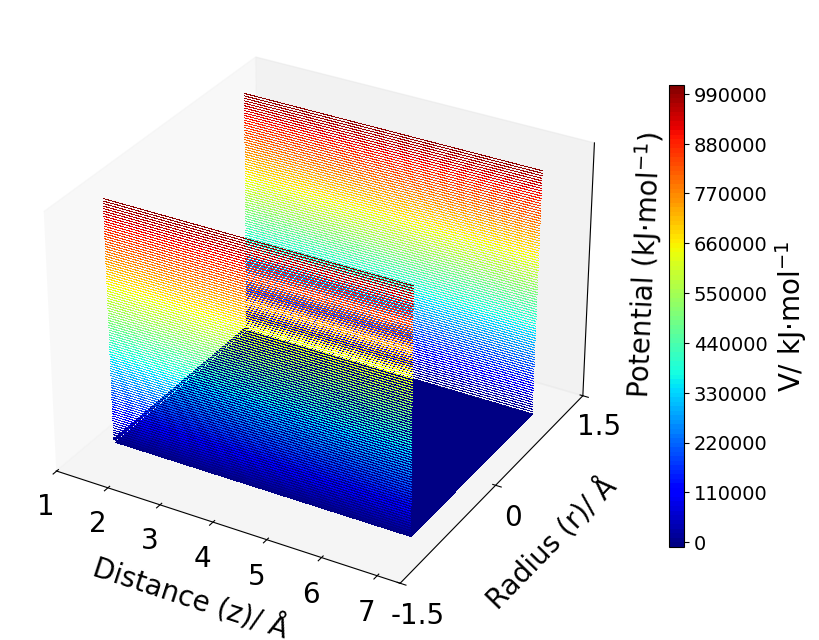

In [ ]:

from mpl_toolkits import mplot3d


plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.grid(False)
plt.contourf(Z,R,VVV1, 100, cmap=plt.cm.jet)
#plt.contourf(Z,R,VVV2, 1000, cmap=plt.cm.jet)
#plt.contourf(Z,R,VVV3, 500, cmap=cm.cool)
ax.set_xlabel('Distance (z)/ Å', fontsize=20 ,labelpad=16)
ax.set_ylabel('Radius (r)/ Å',fontsize=20, labelpad=16)
ax.set_zlabel('Potential (kJ·mol$^{-1}$)',fontsize=20)

# colorbar: left side, shorter, bigger fonts
#cbar = plt.colorbar(location='left', shrink=0.75, cmap='hot', pad=0.06, aspect=30)
cbar = plt.colorbar(shrink=0.75, pad=0.06, aspect=30)
cbar.ax.tick_params(labelsize=14)  # numbers along the bar
cbar.set_label('V/ kJ·mol$^{-1}$', fontsize=20)  # bar label font size
plt.tick_params(labelsize=20)

#ax.set_ylim(-1.5, 0, 1.5)                 # keep the range tight (optional but tidy)
ax.set_yticks([-1.5, 0, 1.5])             # show only these two ticks
ax.set_yticklabels(['-1.5', '0', '1.5'])

ax.set_zticks([])
ax.set_zticklabels([])
# NEW: include the top value as a tick and print it
#plt.ylim(-15, 15)
#ax.set_axis_off()   #This command help to remove the 3D axis
#plt.colorbar()
#plt.colorbar(label='V(r)')
plt.show()



## Comment: ro > R  then we have a Morse potential (R is a raduis or diameter/2 of the cylinder )  If ro < R then, we have another shape (I don't know exactly)

In [ ]:
#Solution Matrix
A = np.zeros((Nr+1,Nr+1))
for i in range(1,Nr):
    for j in range(1,Nr):
        if i==j:
# Main central diagonal.
            A[i,j]=-2
# Lower main diagonal.
        elif i==j+1:
            A[i,j]=(1-(1/(2*(j+1))))
# Upper main diagonal.
        elif i+1==j:
            A[i,j]=(1+(1/(2*(j-1))))


#Boundary conditions at r=0
A[0,0]=-4
A[0,1]=4
A[1,0] = (1-(1/(2*(0+1)))) #left
# Set the boundary conditions
#A[-1:,-1:] =0.5 #rigth
A[N-1:,N:] = (1+(1/(2*((N)-1))))
#A[N:,N-1:] = 0 #bottom
#A[-1:,-1:] = 0 #rigth

A[N:,N-1:] = (1-(1/(2*(N)))) #bottom
A[-1:,-1:] =-2 #rigth
#A[:,4] =0.5

############################################## Division of the Matrix by the square step size (dr)#####################
AA=A/(dr**2)
#AA

B=np.zeros((Nz+1,Nz+1))
for q in range(Nz+1):
    for n in range(Nz+1):
        if q==n:
            B[q,n]=-2
        elif q==n+1:
            B[q,n]=1
        elif q+1==n:
            B[q,n]=1

############################################## Division of the Matrix by the square step size (dz)#####################
BB=B/(dz**2)
#BB


IB=np.identity(N+1)
IA=np.identity(N+1)
####################################################################################################
s1 = np.kron(IB,AA)
s2 = np.kron(BB,IA)
s =  s1 + s2
#s



#Boundary conditions at r=R  here Phi=0

h_bar=1.9e5 #in KJ.A.mol-1.c-2
#T1=-(((h_bar)**2)/(2*m*((dr**2))))*A#
#T1 = -(1/((h)**2))*A
T1=-(((h_bar)**2)/(2*m1))*s#
T2=-(((h_bar)**2)/(2*m2))*s#

#T = T1+T2
#T=-((1)/(h**2))*A


#CONFINED for He4
Hamii=(T1+V4)
eigenvaluess, eigenvectorss = np.linalg.eigh(Hamii)
E=eigenvaluess
W=eigenvectorss.T  #we use T as a transpose here which is a kind of normalization in analytical resolution

#CONFINED for He3
Hamii2=(T2+V4)
eigenvaluess2, eigenvectorss2 = np.linalg.eigh(Hamii2)
E2=eigenvaluess2
W2=eigenvectorss2.T  #we use T as a transpose here which is a kind of normalization in analytical resolution

def Final1(k):
    return eigenvectorss.T[k].reshape((Nz+1,Nr+1))

# k here is the iteration number. if "k=0", "Nr=1, Nz=1" so basically, "k=(Nr+1, Nz+1)"

#CONFINED AT 1.5 Angstrom
def Final2(k):
    return eigenvectorss2.T[k].reshape((Nz+1,Nr+1))

# k here is the iteration number. if "k=0", "Nr=1, Nz=1" so basically, "k=(Nr+1, Nz+1)"

print('-----------------Table of Values (He-4)-------------')
for i in range(3):
    print("{:8d} {:24.4f}".format(i, E[i]))

print('----------------- Table of Values (He-3)-------------')
for i in range(3):
    print("{:8d} {:24.4f}".format(i, E2[i]))


-----------------Table of Values (He-4)-------------
       0                 -13.9386
       1                 -13.8883
       2                 -13.8046
       3                 -13.6876
       4                 -13.5373
       5                 -13.3539
       6                 -13.1375
       7                 -12.8885
       8                 -12.6070
       9                 -12.2933
      10                 -11.9478
      11                 -11.5707
      12                 -11.1625
      13                 -10.7235
      14                 -10.2542
      15                  -9.7551
      16                  -9.2265
      17                  -8.6691
      18                  -8.0835
      19                  -7.8735
      20                  -7.8232
      21                  -7.7395
      22                  -7.6225
      23                  -7.4721
      24                  -7.4701
      25                  -7.2887
      26                  -7.0724
      27                  -6.

In [ ]:
768

768

EXPECTATION VALUES

In [ ]:
# ---- Expectation value <z> (ground state) -----------------------------------

# Build the Z-grid matching the (Nz+1, Nr+1) layout used by Final1/Final2

# Ground-state wavefunctions on the (z,r) grid
psi4_0 = Final1(0)    # 4He ground state ψ(z,r)
psi3_0 = Final2(0)    # 3He ground state ψ(z,r)

# ---------------- Expectation <z> for a state ----------------
def z_expectation(psi_rz):
    prob = np.abs(psi_rz)**2
    # Proper cylindrical volume element would include 2π r dr dz,
    # but per your logic, it cancels in the ratio below.
    zbar = (prob * Z).sum() / prob.sum()
    return float(zbar)

print(f"4He  ⟨z⟩ (ground) = {z_expectation(psi4_0):.6f} Å")
print(f"3He  ⟨z⟩ (ground) = {z_expectation(psi3_0):.6f} Å")


4He  ⟨z⟩ (ground) = 2.157000 Å
3He  ⟨z⟩ (ground) = 5.420244 Å


# Probability

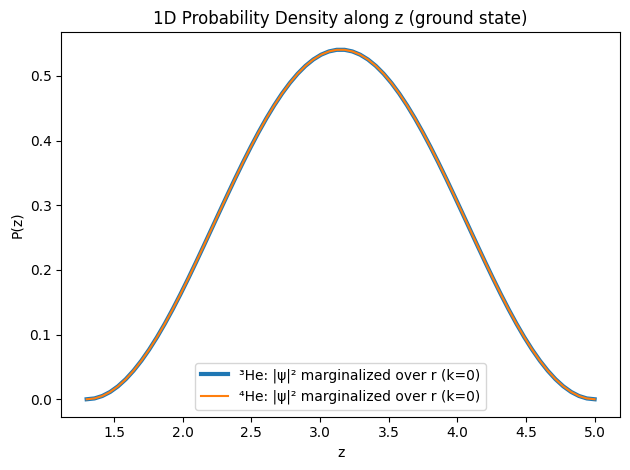

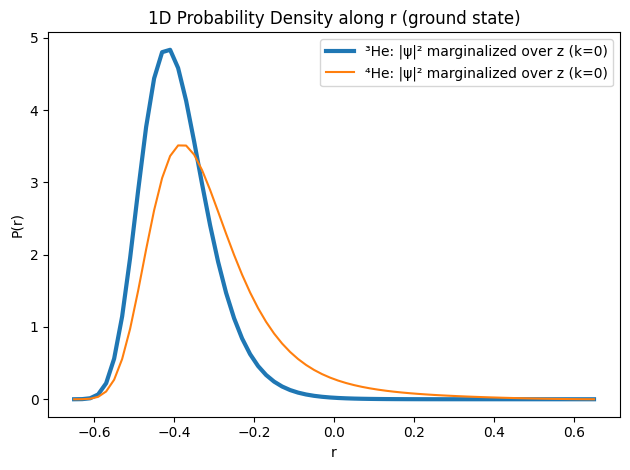

In [ ]:
# Extract ground-state wavefunctions as (Nz+1, Nr+1) arrays
psi3 = Final1(0)  # ³He (from Hamii)
psi4 = Final2(0)  # ⁴He (from Hamii2)

# Probability densities on the grid
rho3 = np.abs(psi3)**2  # shape (Nz+1, Nr+1)
rho4 = np.abs(psi4)**2

# Grid spacings (already defined above, reusing for clarity)
# dr = r[1] - r[0]
# dz = z[1] - z[0]

# -------------------- 1D PDF along z --------------------
# Simple, robust marginal over r (works even if your r-grid contains negatives):
Pz3 = np.sum(rho3, axis=1) * dr   # integrate over r
Pz4 = np.sum(rho4, axis=1) * dr

# Normalize so that ∑ Pz * dz = 1
Pz3 = Pz3 / (np.sum(Pz3) * dz)
Pz4 = Pz4 / (np.sum(Pz4) * dz)

plt.figure()
plt.plot(z, Pz3, label='³He: |ψ|² marginalized over r (k=0)',lw=3)
plt.plot(z, Pz4, label='⁴He: |ψ|² marginalized over r (k=0)')
plt.xlabel('z')
plt.ylabel('P(z)')
plt.title('1D Probability Density along z (ground state)')
plt.legend()
plt.tight_layout()

# -------------------- 1D PDF along r --------------------
# Simple marginal over z:
Pr3 = np.sum(rho3, axis=0) * dz   # integrate over z
Pr4 = np.sum(rho4, axis=0) * dz

# Normalize so that ∑ Pr * dr = 1
Pr3 = Pr3 / (np.sum(Pr3) * dr)
Pr4 = Pr4 / (np.sum(Pr4) * dr)

plt.figure()
plt.plot(r, Pr3, label='³He: |ψ|² marginalized over z (k=0)',lw=3)
plt.plot(r, Pr4, label='⁴He: |ψ|² marginalized over z (k=0)')
plt.xlabel('r')
plt.ylabel('P(r)')
plt.title('1D Probability Density along r (ground state)')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# ====================== ADD THIS AFTER YOUR EXISTING SCRIPT ======================

import numpy as np

def energies_for_mass(mass):
    """Return eigenvalues for both confinements using the given mass."""
    T1_mass = -(((h_bar)**2)/(2*mass))*s
    # 0.5 Å confinement
    H_05 = T1_mass + V4
    evals_05 = np.linalg.eigh(H_05)[0]
    # 1.5 Å confinement
    H_15 = T1_mass + V5
    evals_15 = np.linalg.eigh(H_15)[0]
    return evals_05, evals_15

# Masses (in kJ·mol⁻¹·c⁻²) as you noted at the top
m_He3 = 3.39e11
m_He4 = 2.59e11

# Compute spectra for both isotopes
E4_05, E4_15 = energies_for_mass(m_He4)
E3_05, E3_15 = energies_for_mass(m_He3)

# Number of states to report (change if you want more/less)
n = min(len(E4_05), len(E3_05), 10)

def print_table(title, E4, E3, nstates):
    print(f"\n--- Energies {title} ---")
    print("{:>6s} {:>18s} {:>18s} {:>18s}".format("state", "E_He4", "E_He3", "Delta_ZPE"))
    for k in range(nstates):
        dZPE = E3[k] - E4[k]
        print("{:6d} {:18.6f} {:18.6f} {:18.6f}".format(k, E4[k], E3[k], dZPE))

# Tables for each confinement
print_table("(0.5 Å confinement DO NOT CONSIDER LEVEL n=0)", E4_05, E3_05, n)
print_table("(1.5 Å confinement DO NOT CONSIDER LEVEL n=0)", E4_15, E3_15, n)

# If you also want the pure zero-point-energy isotope shift (ground state only):
ZPE_shift_05 = E3_05[0] - E4_05[0]
ZPE_shift_15 = E3_15[0] - E4_15[0]
print("\nZPE isotope shift (He-3 − He-4):")
print(f"  0.5 Å: {ZPE_shift_05:.6f}")
print(f"  1.5 Å: {ZPE_shift_15:.6f}")
# ================================================================================
